# Project: TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The Movie Database (TMDb) is community based movie and TV database with a large breadth of data. The dataset that has been selected for this project contains iformation like ratings and revenues of about 10.000 movies stored in the TMDb.


Subsequently you'll find the research questions to be answered within this project.

*Q1:* Which **characteristics** are **most important** in order to predict the **quality** (rating) of a movie?

*Q2:* Movies from **which budget range** generate the **highest profit**?

*Q3:* Do **overlength movies** (>120min) generate **higher profits** than regular lenght movies?

*Q4:* Has the **popularity of movies** from certain **genres changed over the timespan of ten years** (2005-2015)?


In [73]:
# Before starting into the actual data analysis process, the necessary libraries and packages are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
Subsequently the steps 'a. Gather', 'b. Asses' and 'c. Clean' of the Data Analysis Process are performed for the project data. Goal of thise phase is understanding the respective data and bringing it into a state in which further analysis can be conducted.

### a. Gather
First step is to access the process data, so the dataset with the project data is generated from a csv-file.

In [74]:
# Loading csv file as data frame and inspecting first samples in dataset
df = pd.read_csv('tmdb-movies.csv')

### b. Assess
In order to sufficiently understand the project data, the shape, rows and columens as well as the datatypes and mean values are examined.

In [75]:
# Shape of the data frame
df.shape

(10866, 21)

In [76]:
# Number of samples, column labels, null-values and units
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [77]:
# Checking if units of all objects is 'str'
obj_labels = ['imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','genres','production_companies','release_date']
for c in obj_labels:
   print(c, type(df[c][0]))

imdb_id <class 'str'>
original_title <class 'str'>
cast <class 'str'>
homepage <class 'str'>
director <class 'str'>
tagline <class 'str'>
keywords <class 'str'>
overview <class 'str'>
genres <class 'str'>
production_companies <class 'str'>
release_date <class 'str'>


In [78]:
# Short glimps on general values for the dataset columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
In the Cleaning phase potential problemns in the provided dataset are idtentified and subsequently solved. The data is brought into a state from which further analysis can be conducted.

**I.** The columns which are not needed in order to answert the in the introduction created questions, are dropped from the dataset

In [79]:
# REMOVING COLUMNS not necessary to answer defined questions
df.drop(['imdb_id','budget','revenue','cast','homepage','director', 'tagline', 'keywords','overview','production_companies', 'release_date'], axis=1, inplace=True)

# 'budget' and 'revenue' dropbed for comparability - 'budget_adj' and 'revenue_adj' more suitable

**II.** Duplicates in the are detected and droped from the dataframe

In [80]:
# REMOVING DUPLICATES
# Checking for duplicates
df.duplicated().sum()

# Which row in the dataset is the duplicate?
df.loc[df.duplicated()==True]

#Drop the duplicate
df.drop_duplicates(inplace=True)

#Checking for duplicates again
df.duplicated().sum()

0

**III.** For comparability reasons only the columns 'budget_adj' and 'revenue_adj' with values for which the inlflation is accounted for are going to be used for the furher analysis. To provide easier access these columns get their labels changed to 'budget' and 'revenue'.

In [81]:
# RENAME COLUMNS 'budget_adj' and 'revenue_adj'
df.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'}, inplace=True)

**IV.** Rows 'budget' and 'revenue' contain float values. In order to make handling in these columns easier and saving memory space, the type for these columns is changed to integer.

In [82]:
# CHANGE DATA TYPE TO INT
df.budget = df.budget.astype(int)
df.revenue = df.revenue.astype(int)

**V.** Some rows contain the value '0' or sometimes even negative values in the columns 'budget' and 'revenue' . Apparently this is due to missing data, as there can't be any movies without a budget and a revenue. To make sure that the movies with missing data don't falsify any further analysis, these rows are deleted from the dataset.

In [83]:
# Checking if information is missing (=0) or is false (negative value) in columns with int or float values
labels = ['popularity','runtime','vote_count','release_year','budget','revenue']

for c in labels:
    print(df.loc[df[c] <= 0,[c]].count())
    
# -> There are samples with missing or false information in the columns 'runtime', 'budget' and 'revenue'

popularity    0
dtype: int64
runtime    31
dtype: int64
vote_count    0
dtype: int64
release_year    0
dtype: int64
budget    5698
dtype: int64
revenue    6020
dtype: int64


In [84]:
# Deleting rows with missing or false data
labels = ['runtime','budget','revenue']

for c in labels:
    df = df[df[c] > 0]

In [85]:
# Checking shape of the dataframe after deleting the rows
df.shape

(3849, 10)

After removing unnecessary information, adapting datatypes and removing duplicates as well as missing and false information from the dataset, the next phase of the data analysis process can be started.

<a id='eda'></a>
## Exploratory Data Analysis
Within the exploration phase, general patterns in the data are detected, relationships between the data visualized. Subsequently specific analysis to answert the in the introduction created questions will be conducted.

### Question 1: What characteristics are associated with a high quality (rating) movie?
To answer this question, it has to be specified how the group of 'high quality movies' is defined. Following the 'high quality movies' are defined by movies whith an average rating exceeding the 3rd quantile value (75%) of the 'vote_average' column.

**I.** We have to make sure, that the 'vote_count' for each movie is sufficiently high to allow a statement about the movie's quality. Also a short visual crosscheck about the values from 'vote_average' is to be conducted.

In [86]:
# Checking if values for 'vote_count' are reliable
df.vote_count.describe()

count    3849.000000
mean      523.545336
std       866.281871
min        10.000000
25%        71.000000
50%       204.000000
75%       576.000000
max      9767.000000
Name: vote_count, dtype: float64

The minimum value for 'vote-count' with 10 (10 people who rated the quality of a movie) is sufficiently high to use all of these elemens for futher analyisis.

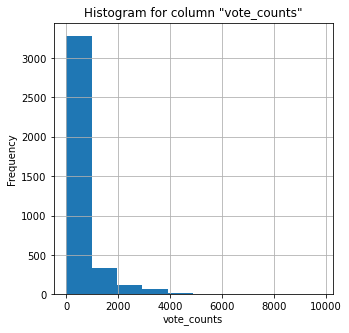

In [87]:
df.vote_count.hist(figsize=(5,5));
plt.title('Histogram for column "vote_counts"')
plt.xlabel('vote_counts')
plt.ylabel('Frequency');

In [88]:
# Check general statistics for 'vote_average'
df.vote_average.describe()

count    3849.000000
mean        6.167134
std         0.794297
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

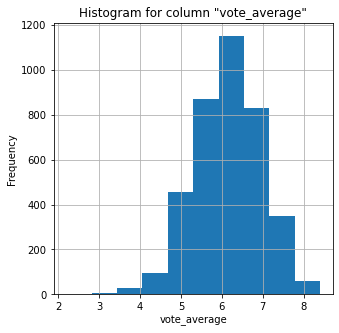

In [89]:
df.vote_average.hist(figsize=(5,5));
plt.title('Histogram for column "vote_average"')
plt.xlabel('vote_average')
plt.ylabel('Frequency');

The distribution of 'vote_average' seems to be left-skewed.

**II.** In order to create a new dataframe with the samples exceeding the 3rd quantile (75%) of the 'average-rating' column a query-function is used.

In [90]:
# Split database according to 3rd quantile
top = df.query('vote_average > vote_average.quantile(0.75)')

In [91]:
# Identifying characteristics for 'high quality movie'
labels_float = ['popularity','vote_average']
for c in labels_float:
    print(c, top[c].mean().round(2))
    
labels_int = ['runtime','release_year','budget','revenue']
for c in labels_int:
    print(c, top[c].mean().astype(int))

popularity 1.9
vote_average 7.18
runtime 118
release_year 1998
budget 44270598
revenue 211815133


The characteristics of a high quality movie are given with the above stated mean-values for the columns of our dataset.

### Question 2: Movies from which budget range generate he highest profit?
To answer this question budget classes have to be defined. Values chosen to seperate the classes are minimum, the first quantile, the 2nd quantile, the 3rd quantile and the maximum of the column 'budget'.

**I.** In order to compare the profits of movies, a new dataframe with a profit-column and respective values (profit = revenue - profit) has to be created.

In [92]:
# Creating new dataframe for the analysis
df_new = df.copy()

In [93]:
# Creating new column for profit values in data frame
profit = np.zeros(3849)
df_new['profit'] = profit

In [94]:
# Calculating and inserting the profit for every movie in the data frame
df_new['profit'] = df_new['revenue'] - df_new['budget']

**II.** Now the budget classes are created with the min, max and quantile-values as limits of the classes.

In [95]:
# Check general values for column 'budget'
df_new.budget.describe()

count    3.849000e+03
mean     4.414380e+07
std      4.456966e+07
min      1.000000e+00
25%      1.309053e+07
50%      3.001558e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget, dtype: float64

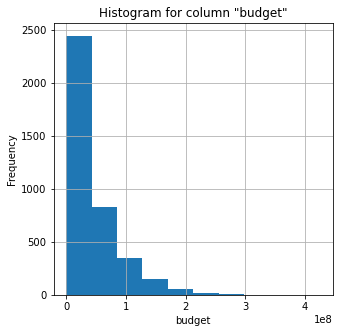

In [96]:
df_new.budget.hist(figsize=(5,5));
plt.title('Histogram for column "budget"')
plt.xlabel('budget')
plt.ylabel('Frequency');

In [97]:
# Defining budget-classes and inserting it into dataframe
bin_edges = [df.budget.min(),df.budget.quantile(0.25),df.budget.quantile(0.5),df.budget.quantile(0.75),df.budget.max()]
bin_names = ['low','medium','moderately high','high']
df_new['budget_class'] = pd.cut(df_new['budget'], bin_edges, labels = bin_names)

In [98]:
# Checking that new columns an values are in dataframe
df_new.head(1)

,id,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget,revenue,profit,budget_class
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445892,1254445953,high


In [99]:
# Group by 'budget_classes' and show values for 'profit'
df_new.groupby('budget_class').profit.mean().round(1)

budget_class
low                 31777342.5
medium              57052731.2
moderately high     82571062.6
high               190585706.2
Name: profit, dtype: float64

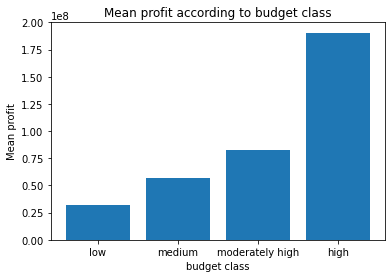

In [100]:
# Creating bar diagram with mean profit values for different budget classes
locations_q2 = bin_names
heights_q2 = []
for c in bin_names:
    heights_q2.append(df_new.groupby('budget_class').profit.mean().round(1)[c])
    

plt.bar(locations_q2, heights_q2)
plt.title('Mean profit according to budget class')
plt.xlabel('budget class')
plt.ylabel('Mean profit');

The diagram shows the mean profit values for the defined budget classes.

### Question 3: Do overlength movies (>120min) generate higher profits than regular lenght movies?
For providing an answert to this question overlength movies are defined as data with a value higher than 120 in the 'runtime'-column.

**I.** A check of the relevant values for the 'runtime'-column is performed.

In [101]:
# Overlenght is defined as >120 min
df.runtime.describe()

count    3849.000000
mean      109.183164
std        19.866223
min        15.000000
25%        95.000000
50%       105.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

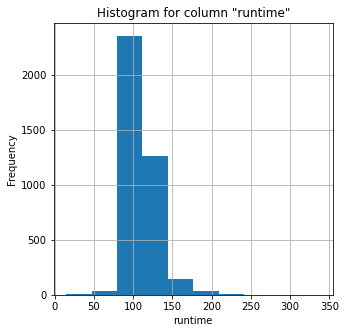

In [102]:
df.runtime.hist(figsize=(5,5));
plt.title('Histogram for column "runtime"')
plt.xlabel('runtime')
plt.ylabel('Frequency');

**II.** Next the dataframe from question 2 (profit column already implemented) is split into two new dataframes according to the values >120 and <= 120 in the 'runtime' column.

In [103]:
# Creating two dfs with overlength data and normal length data
over_len = df_new.query('runtime > 120')
normal_len = df_new.query('runtime <= 120')

In [104]:
# Calculating mean profit values for runtime-length classes
print(normal_len.profit.mean().round(1), over_len.profit.mean().round(1))

68395947.3 164640280.9


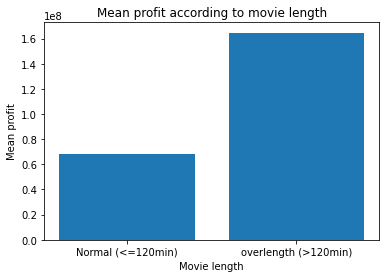

In [105]:
# Creating bar diagramm with results
locations_q3 = ['Normal (<=120min)', 'overlength (>120min)']
heights_q3 = [normal_len.profit.mean(), over_len.profit.mean()]

plt.bar(locations_q3, heights_q3)
plt.title('Mean profit according to movie length')
plt.xlabel('Movie length')
plt.ylabel('Mean profit');

The diagram shows the mean profit value for movies with normal lengt (<=120 min) and overlength (>120min).

### Question 4: Has the popularity of movies from certain genres changed over the timespan of ten years (2005-2015)?
An element in the column 'genres' contains different genres a movie is assigned to. Within the string the different genres are seperated by '|'. In order to do further analysis and answer this question one row should only hold one genre-string.

**I.** The different categories from the column 'genres' have to be seperated and be put into single rows. This is done by creating a help-dataframe an merging it with the dataframe from question 1.

In [106]:
# A help-dataframe is created with only one genre-category in each row and the 'id'-identifier for each row
df_help = pd.DataFrame(df.genres.str.split('|').tolist(), index=df.id).stack()
df_help = df_help.reset_index([0, 'id'])
df_help.columns = ['id', 'genres']

In [107]:
# The help-dataframe is merged with the regular dataframe according to the column 'id'
df1 = df_help.merge(df, left_on='id', right_on='id', how='inner')

**II.** By merging the tow dataframes according to 'id', two columns 'genres_y' and 'genres_x' have been created. Following the column 'genres_y' is droped from the data frame to prevent confusion in future operations.

In [108]:
# Drop 'genres_y' and rename 'genres_x'
df1.drop(['genres_y'], axis=1, inplace=True)
df1 = df1.rename(columns={'genres_x':'genres'})

**III.** Now the dataframe is separated into two dataframes according to the release year of the movies.

In [109]:
# Differentiate movies from 2005 to 2009 and 2010 to 2014
df_10 = df1.query('release_year==["2005","2006","2007","2008","2009"]')
df_15 = df1.query('release_year==["2010","2011","2012","2013","2014"]')

print(df_10.shape, df_15.shape)

(2280, 10) (2185, 10)


**IV.** In order to get the changes in popularity, the mean values for the two dataframes are built and their difference is calculated.

In [110]:
# get mean popularity for genres
pop_10 = df_10.groupby('genres').mean()['popularity']
pop_15 = df_15.groupby('genres').mean()['popularity']

In [111]:
# Get difference fromt 2015 to 2010
pop_diff = pop_15 - pop_10
pop_diff = pop_diff.round(2).abs()

print(pop_diff)

genres
Action             0.83
Adventure          1.29
Animation          0.20
Comedy             0.35
Crime              0.38
Documentary        0.04
Drama              0.41
Family             0.30
Fantasy            0.74
Foreign            0.06
History            0.65
Horror             0.22
Music              0.24
Mystery            0.69
Romance            0.22
Science Fiction    1.46
Thriller           0.45
War                0.86
Western            0.87
Name: popularity, dtype: float64


**V.** For visualization reasons the changes in popularity to be shown in a diagram are limited to the five most prominent changes.

In [112]:
# Limiting the results to the five largest changes in popularity
pop_diff_max = pop_diff.nlargest(5)

Text(0, 0.5, 'Mean popularity change')

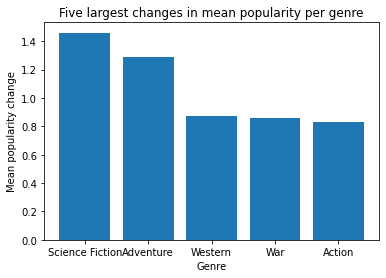

In [113]:
# Creating bar diagram
heights = list(pop_diff_max)
location = pop_diff_max.index.tolist()

plt.bar(location, heights)
plt.title('Five largest changes in mean popularity per genre')
plt.xlabel('Genre')
plt.ylabel('Mean popularity change')

The diagram shows the changes in mean popularity of movie genres between the periods 2005 - 2009 and 2010 - 2014.


<a id='limitations'></a>
## Limitations

Concerning the provided TMDb dataset there were limitations which influenced the creation of research questions which could be covered within this project and influenced the quality of the conducted analysis.

- **Currentness of data:** The movies with the most recent release date in the dataset have been released in the year 2015. Because of this it was not possible to deduce any insight about developments in the movie sector in the recent years (2016 - 2020). The curentness of data also led to a revision of the research question 4 which was originally designed to cover the timespan from 2010 to the year 2020.

- **Completeness of data:** Only about 35% of the original data samples showed the necessary quality to be used within the exploration phase of this project. Data cleaning measures in the form of removing duplicates as well as samples with missing or false values (eg. negative values) have been conducted. However the possibility of false entries in the dataset (eg. transposed digits within the 'budget' or 'revenue' column ) which influence the results of this project can't be excluded with 100 precent certainty.

<a id='conclusions'></a>
## Conclusions

Following the colunclusions according to the questions created within the chapter 'introduction'.

### Question 1: What characteristics are associated with a high quality (rating) movie?
A high quality movie as defined has a mean popularity-rating of '1.9', an average quality rating of '7.18' a runtime of '118 minutes and is released in the year '1998'. It has a budget of '44,270,598' dollars (based on 2010 dollars) and a mean revenue of '211,815,133' dollars (based on 2010 dollars).


### Question 2: Movies from which budget range generate he highest profit?
Movies from the low-budget class generate a mean profit of '31,777,342.5', from the medium-budget-class of '57,052,731.2', from the moderately-high-budget class of '82,571,062.6' and from the high-budget class of '190,585,706.2', all values based on 2010 dollars.

Apparently movies with a high budget also make the highest mean profit. This finding isn't very surprising, as more money is allocated to marketing and the movies are presented in more cinemas than the lower budget movies. From a movie director's or rather producer's view it could be interesting to see, if the revenue/budget ratio is higher for low-budget movies or high-budget movies. This aspect could be covered in future analysis.

### Question 3: Do overlength movies (>120min) generate higher profits than regular lenght movies?
Movies with a length <120 min generate a mean profit of 68,395,947.3 dollars, while movies with a length of >120min generate a mean profit of 164,640,280.9 dollars, based on 2010 dollars.

Apparently movies with overlength also make higher profits. This isn't very surprising as propably also the invested budget for overlength movies is significantly higher than for regular movies. It could be interesting to also further organize the findings in budget classes to incease the information value. As stated in the conclusion from question 2 further analysis would be helpful to better understand the generated results.

### Question 4: Has the popularity of movies from certain genres changed over the timespan of ten years (2005-2015)?
The five highest mean changes according to the popularity rating from timespan 1 (2005-2009) to timespan 2 (2010-2014) were in the genres Science Fiction by 1.46, Adventure by 1.29, Western Genre by 0.87, War by 0.86 and Action by 1.29. All of those genres show a mean increase in popularity.

Obviously there have been changes in popularity for all movie genres over the regarded timespans. However currently we don't know what causes these changes. Has more money been allocated to movies from  certain genres in recent years? Are certain genres slowly but certainly dying out? Originating from this results there are different approaches to further analyze the reasons for the detected changes.